**Python Project**<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" 
src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>

<p>The Nobel Prize is perhaps the world's most recognized scientific award. It is awarded every year to scientists and academics in the fields of chemistry, literature, physics, medicine, economy and peace. In this project, we will examine Nobel Prize winners. </p>

## Cases

1. Find the top ten countries that won the most Nobel Prizes.
2. List the first women to win Nobel Prizes.
3. List the first men to win Nobel Prizes.
4. Visualize the year from which the country that has won the most Nobel prizes has dominated and what are the factors that have played a role in this dominance? Can you share your insights?
5. Visualize and interpret the categories and countries of the Nobel Prize winners between 1938-1945.
6. Visualize and interpret the categories and countries of the Nobel Prize winners between 1947-1991. (A separate graph is required for each category)
7. Visualize the countries and ages of people in the categories of Chemistry, Literature, Peace, Physics and Medicine after 2000. (Separate visualizations are required for each category) Interpret the data.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv ('C:/Users/serif/OneDrive/Desktop/VERİ ÇALIŞMALARI/Python/Python_Proje/proje.csv')

In [5]:
df.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')

In [6]:
df.shape

(911, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  911 non-null    int64 
 1   category              911 non-null    object
 2   prize                 911 non-null    object
 3   motivation            823 non-null    object
 4   prize_share           911 non-null    object
 5   laureate_id           911 non-null    int64 
 6   laureate_type         911 non-null    object
 7   full_name             911 non-null    object
 8   birth_date            883 non-null    object
 9   birth_city            883 non-null    object
 10  birth_country         885 non-null    object
 11  sex                   885 non-null    object
 12  organization_name     665 non-null    object
 13  organization_city     667 non-null    object
 14  organization_country  667 non-null    object
 15  death_date            593 non-null    ob

In [8]:
df.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

## 1.Find the top ten countries that won the most Nobel Prizes.

In [10]:
country_counts = df['organization_country'].value_counts()

In [11]:
top_10_counties = country_counts.head(10)
top_10_counties

organization_country
United States of America               341
United Kingdom                          89
Germany                                 43
France                                  36
Federal Republic of Germany             23
Switzerland                             21
Sweden                                  17
Japan                                   16
Netherlands                             11
Union of Soviet Socialist Republics      9
Name: count, dtype: int64

## 2.List the first women to win Nobel Prizes.

In [12]:
df.female = df[df['sex'] =='Female']

C:\Users\serif\AppData\Local\Temp\ipykernel_1140\198919514.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.female = df[df['sex'] =='Female']


In [13]:
df.female.shape

(49, 18)

In [14]:
df.female_sorted = df.female.sort_values(by=['category' , 'year' ])

C:\Users\serif\AppData\Local\Temp\ipykernel_1140\986713045.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.female_sorted = df.female.sort_values(by=['category' , 'year' ])


In [15]:
first_female_winners = df.female_sorted.groupby('category').first().reset_index()
first_female_winners

,category,year,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,Chemistry,1911,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France
1,Economics,2009,The Sveriges Riksbank Prize in Economic Scienc...,"""for her analysis of economic governance, espe...",1/2,846,Individual,Elinor Ostrom,1933-08-07,"Los Angeles, CA",United States of America,Female,Indiana University,"Bloomington, IN",United States of America,2012-06-12,"Bloomington, IN",United States of America
2,Literature,1909,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,None,None,None,1940-03-16,Mårbacka,Sweden
3,Medicine,1947,The Nobel Prize in Physiology or Medicine 1947,"""for their discovery of the course of the cata...",1/4,344,Individual,"Gerty Theresa Cori, née Radnitz",1896-08-15,Prague,Austria-Hungary (Czech Republic),Female,Washington University,"St. Louis, MO",United States of America,1957-10-26,"St. Louis, MO",United States of America
4,Peace,1905,The Nobel Peace Prize 1905,"""for her non-violent struggle for democracy an...",1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,None,None,None,1914-06-21,Vienna,Austria
5,Physics,1903,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,University of California,"San Diego, CA",United States of America,1934-07-04,Sallanches,France


Above is the list of the first female winners in each category.

## 3.List the first men to win Nobel Prizes.

In [16]:
df.male = df[df['sex'] =='Male']

C:\Users\serif\AppData\Local\Temp\ipykernel_1140\3000255064.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.male = df[df['sex'] =='Male']


In [17]:
df.male_sorted = df.male.sort_values(by=['category' , 'year'])

C:\Users\serif\AppData\Local\Temp\ipykernel_1140\824816917.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.male_sorted = df.male.sort_values(by=['category' , 'year'])


In [18]:
first_male_winners = df.male_sorted.groupby('category').first().reset_index()
first_male_winners

,category,year,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,Chemistry,1901,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,Economics,1969,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,677,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Male,University of Oslo,Oslo,Norway,1973-01-31,Oslo,Norway
2,Literature,1901,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,None,None,None,1907-09-07,Châtenay,France
3,Medicine,1901,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
4,Peace,1901,The Nobel Peace Prize 1901,"""for his work for peace in Central America, ef...",1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Sorbonne University,Paris,France,1910-10-30,Heiden,Switzerland
5,Physics,1901,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


Above is the list of the first male winners in each category.

## 4.Visualize the year from which the country that has won the most Nobel prizes has dominated and what are the factors that have played a role in this dominance? Can you share your insights?

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df_country_year = df[['organization_country' , 'year']]

In [21]:
df_usa = df_country_year[df_country_year['organization_country'] == 'United States of America']

In [22]:
usa_y_c = df_usa.groupby('year').size()

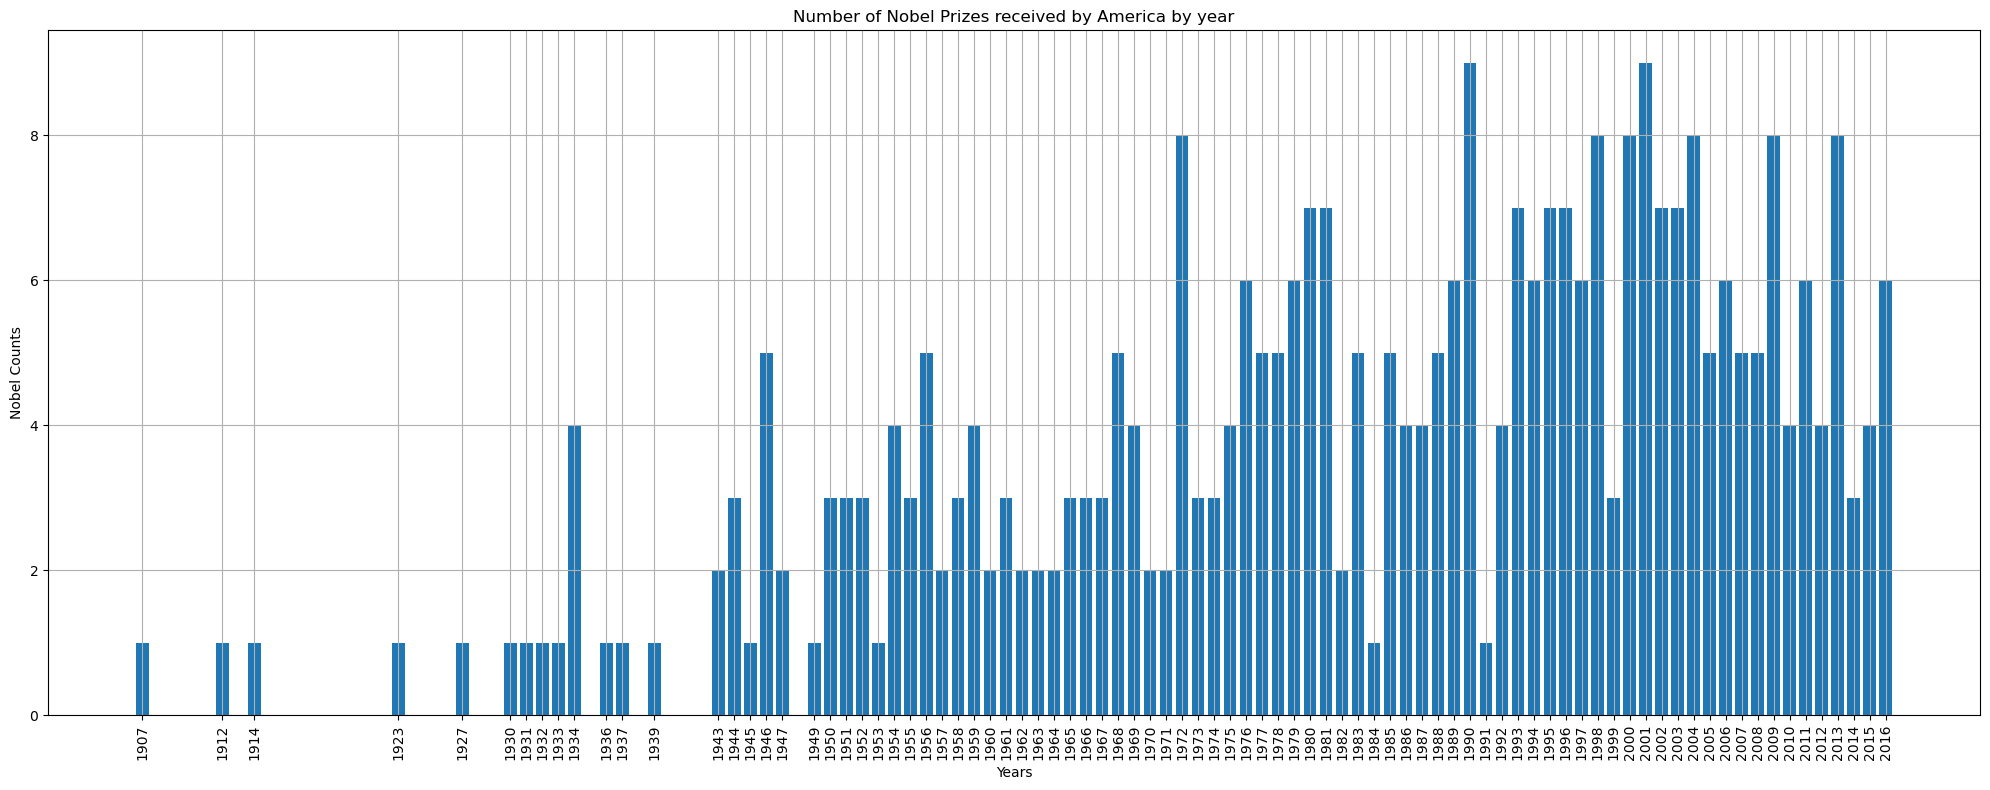

In [23]:
plt.figure(figsize=(20, 8))
plt.bar(usa_y_c.index, usa_y_c.values)
plt.title('Number of Nobel Prizes received by America by year')
plt.xlabel('Years')
plt.ylabel('Nobel Counts')
plt.xticks(ticks=usa_y_c.index, rotation=90)
plt.grid(True)
plt.tight_layout()

The graph above shows the total number of Nobel Prizes received by the United States of America, the country with the highest number of prizes, by year. These numbers are calculated by country of organization. It is clear from the graph that the United States of America dominated the number of prizes awarded after the Second World War. This can be explained by the post-war migration of scientists from devastated Europe to the United States.

## 5.Visualize and interpret the categories and countries of the Nobel Prize winners between 1938-1945.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df["year"] = pd.to_datetime(df["year"], format="%Y")
filtered_data = df[(df["year"].dt.year>=1938) & (df["year"].dt.year <=1945)]

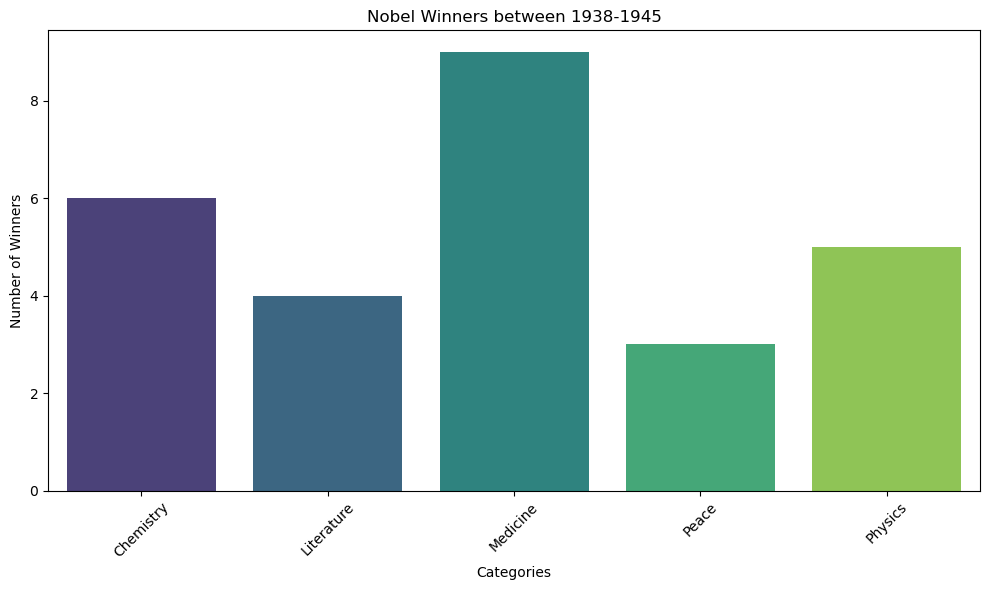

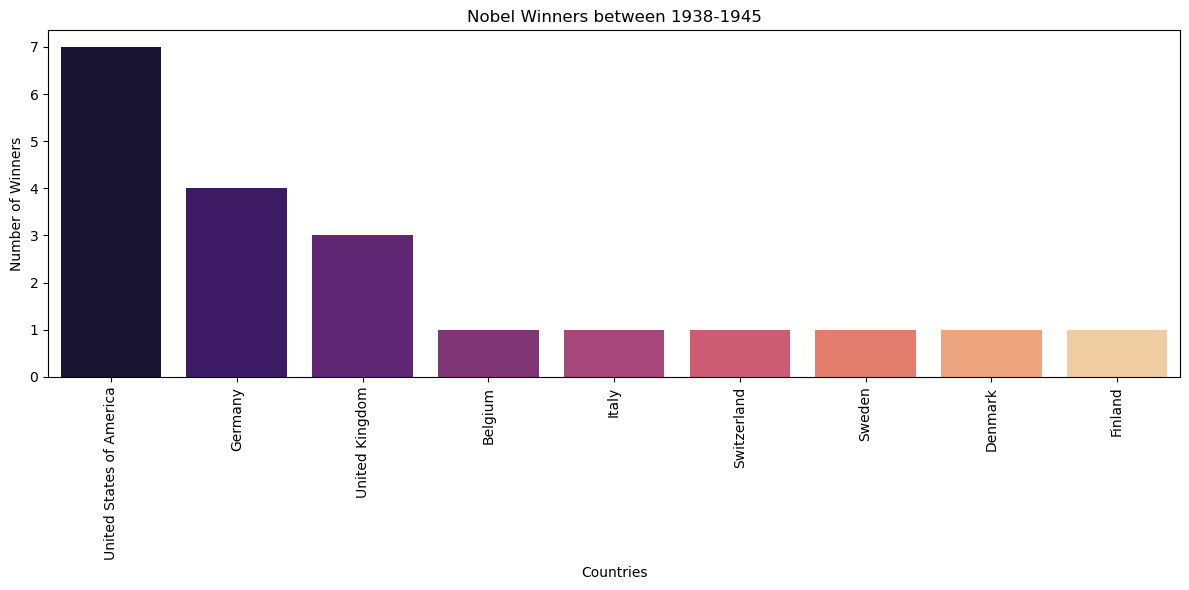

In [27]:
plt.figure(figsize= (10,6))
sns.countplot(x="category",data=filtered_data, palette="viridis")
plt.title("Nobel Winners between 1938-1945")
plt.xlabel("Categories")
plt.ylabel("Number of Winners")
plt.xticks (rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x="organization_country",data=filtered_data, palette="magma",order=filtered_data["organization_country"].value_counts().index)

plt.title("Nobel Winners between 1938-1945")
plt.xlabel("Countries")
plt.ylabel("Number of Winners")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The two graphs above visualize the awards won between 1938 and 1945, i.e. during World War II. The category that stands out here is medicine. The efforts to heal wounded soldiers waiting for help in hospitals after the war led to great discoveries. Other categories are chemistry and physics. Here, too, the arms race and the development of bombs led to improvements in these two categories.

The United States of America and Germany stand out among the prize-winning countries. These countries, which are actively at war, have received Nobel Prizes for their investments in science in the background of the war.

## 6.Visualize and interpret the categories and countries of the Nobel Prize winners between 1947-1991. (A separate graph is required for each category)

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [54]:
df = pd.read_csv ('C:/Users/serif/OneDrive/Desktop/VERİ ÇALIŞMALARI/Python/Python_Proje/proje.csv')

In [55]:
filtered_data = df[(df['year']>=1947) & (df['year']<=1991) & (df['category']=='Medicine')]

In [56]:
country_counts = filtered_data['organization_country'].value_counts()
category_counts = filtered_data['category'].value_counts()

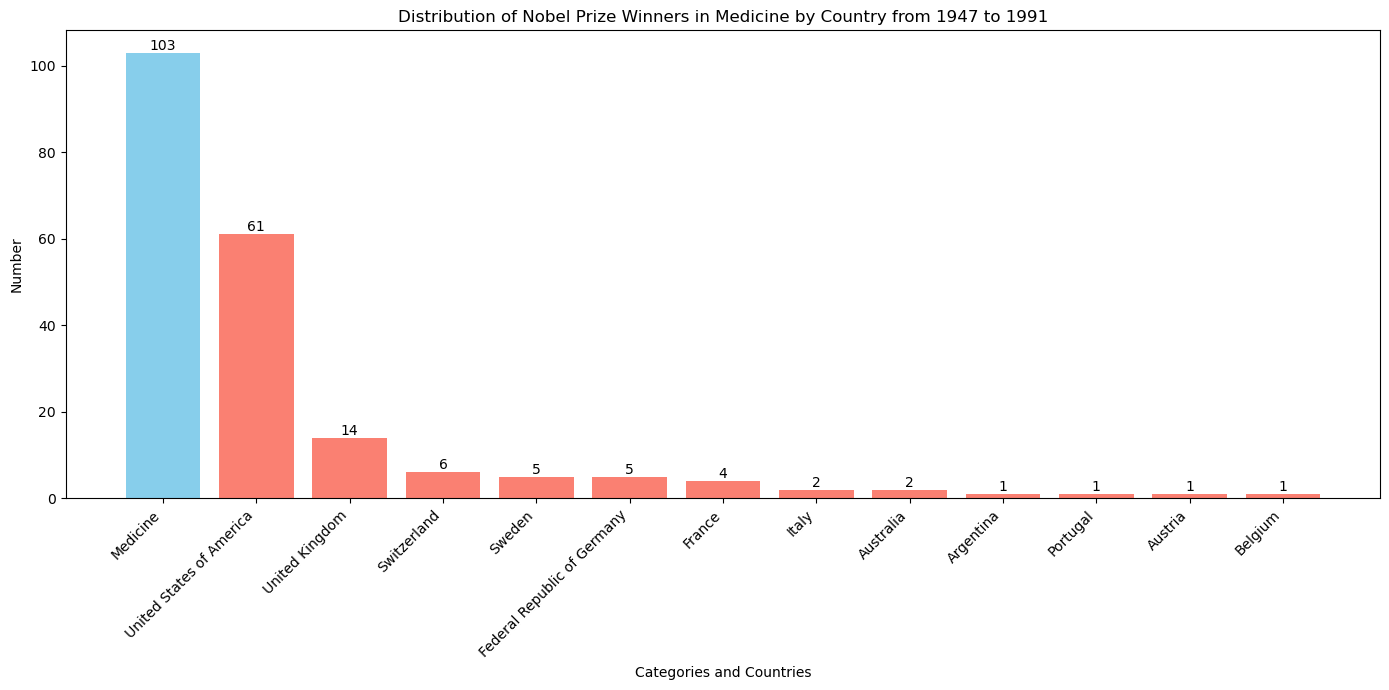

In [57]:
categories = category_counts.index
countries = country_counts.index
values = np.concatenate([category_counts.values, country_counts.values])
colors = ['skyblue'] * len(categories) + ['salmon'] * len(countries)
plt.figure(figsize=(14, 7))
bars = plt.bar(np.arange(len(categories) + len(countries)), values, color=colors)
plt.xlabel('Categories and Countries')
plt.ylabel('Number')
plt.title('Distribution of Nobel Prize Winners in Medicine by Country from 1947 to 1991')
plt.xticks(np.arange(len(categories) + len(countries)), list(categories) + list(countries), rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [58]:
filtered_data = df[(df['year']>=1947) & (df['year']<=1991) & (df['category']=='Peace')]
category_counts = filtered_data['category'].value_counts()

In [59]:
country_counts = filtered_data['birth_country'].value_counts()

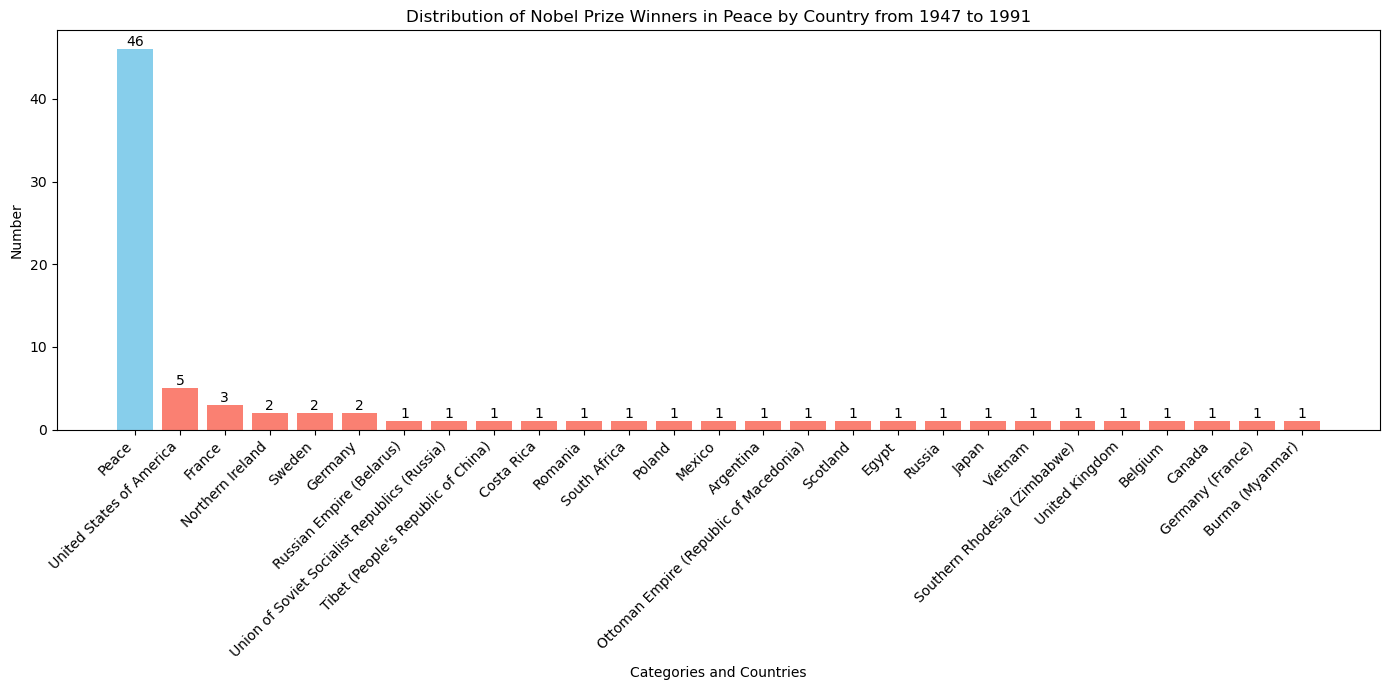

In [60]:
categories = category_counts.index
countries = country_counts.index
values = np.concatenate([category_counts.values, country_counts.values])
colors = ['skyblue'] * len(categories) + ['salmon'] * len(countries)
plt.figure(figsize=(14, 7))
bars = plt.bar(np.arange(len(categories) + len(countries)), values, color=colors)
plt.xlabel('Categories and Countries')
plt.ylabel('Number')
plt.title('Distribution of Nobel Prize Winners in Peace by Country from 1947 to 1991')
plt.xticks(np.arange(len(categories) + len(countries)), list(categories) + list(countries), rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [61]:
filtered_data = df[(df['year']>=1947) & (df['year']<=1991) & (df['category']=='Economics')]

In [62]:
category_counts = filtered_data['category'].value_counts()
country_counts = filtered_data['organization_country'].value_counts()

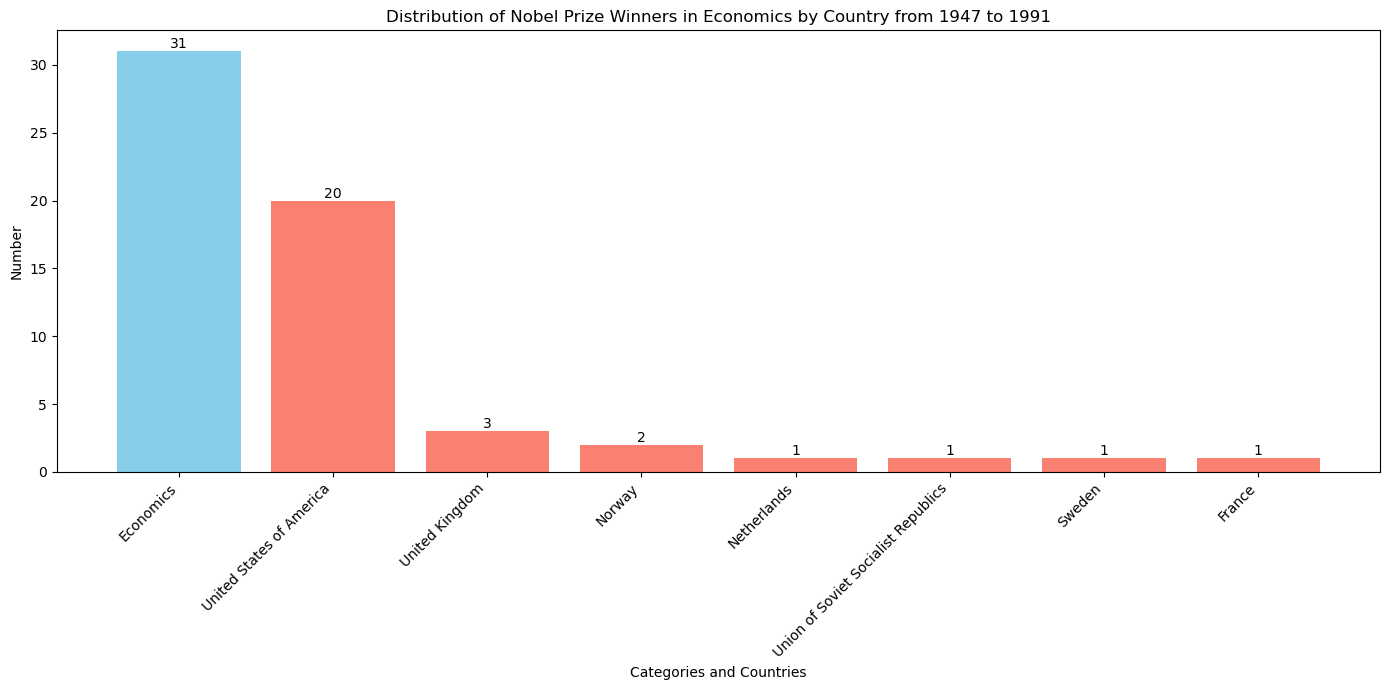

In [63]:
categories = category_counts.index
countries = country_counts.index
values = np.concatenate([category_counts.values, country_counts.values])
colors = ['skyblue'] * len(categories) + ['salmon'] * len(countries)
plt.figure(figsize=(14, 7))
bars = plt.bar(np.arange(len(categories) + len(countries)), values, color=colors)
plt.xlabel('Categories and Countries')
plt.ylabel('Number')
plt.title('Distribution of Nobel Prize Winners in Economics by Country from 1947 to 1991')
plt.xticks(np.arange(len(categories) + len(countries)), list(categories) + list(countries), rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [64]:
filtered_data = df[(df['year']>=1947) & (df['year']<=1991) & (df['category']=='Chemistry')]

In [65]:
category_counts = filtered_data['category'].value_counts()
country_counts = filtered_data['organization_country'].value_counts()

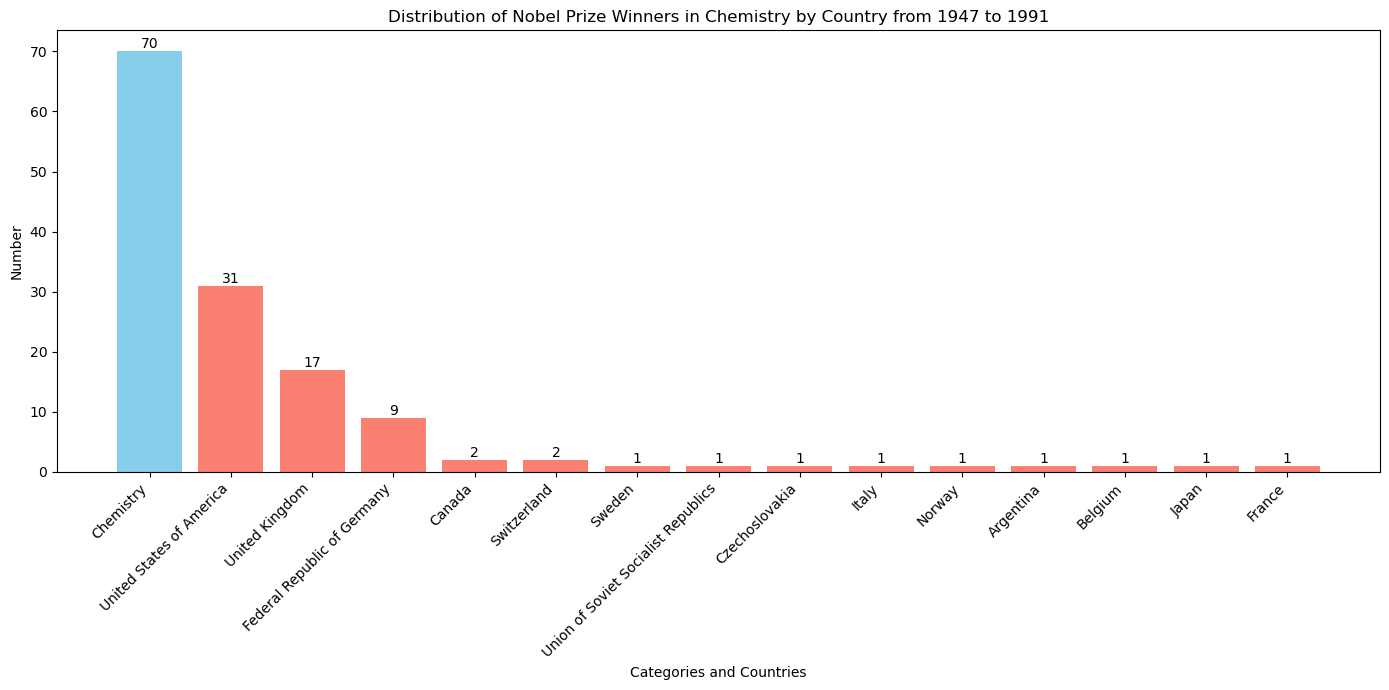

In [66]:
categories = category_counts.index
countries = country_counts.index
values = np.concatenate([category_counts.values, country_counts.values])
colors = ['skyblue'] * len(categories) + ['salmon'] * len(countries)
plt.figure(figsize=(14, 7))
bars = plt.bar(np.arange(len(categories) + len(countries)), values, color=colors)
plt.xlabel('Categories and Countries')
plt.ylabel('Number')
plt.title('Distribution of Nobel Prize Winners in Chemistry by Country from 1947 to 1991')
plt.xticks(np.arange(len(categories) + len(countries)), list(categories) + list(countries), rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [67]:
filtered_data = df[(df['year']>=1947) & (df['year']<=1991) & (df['category']=='Physics')]

In [68]:
category_counts = filtered_data['category'].value_counts()
country_counts = filtered_data['organization_country'].value_counts()

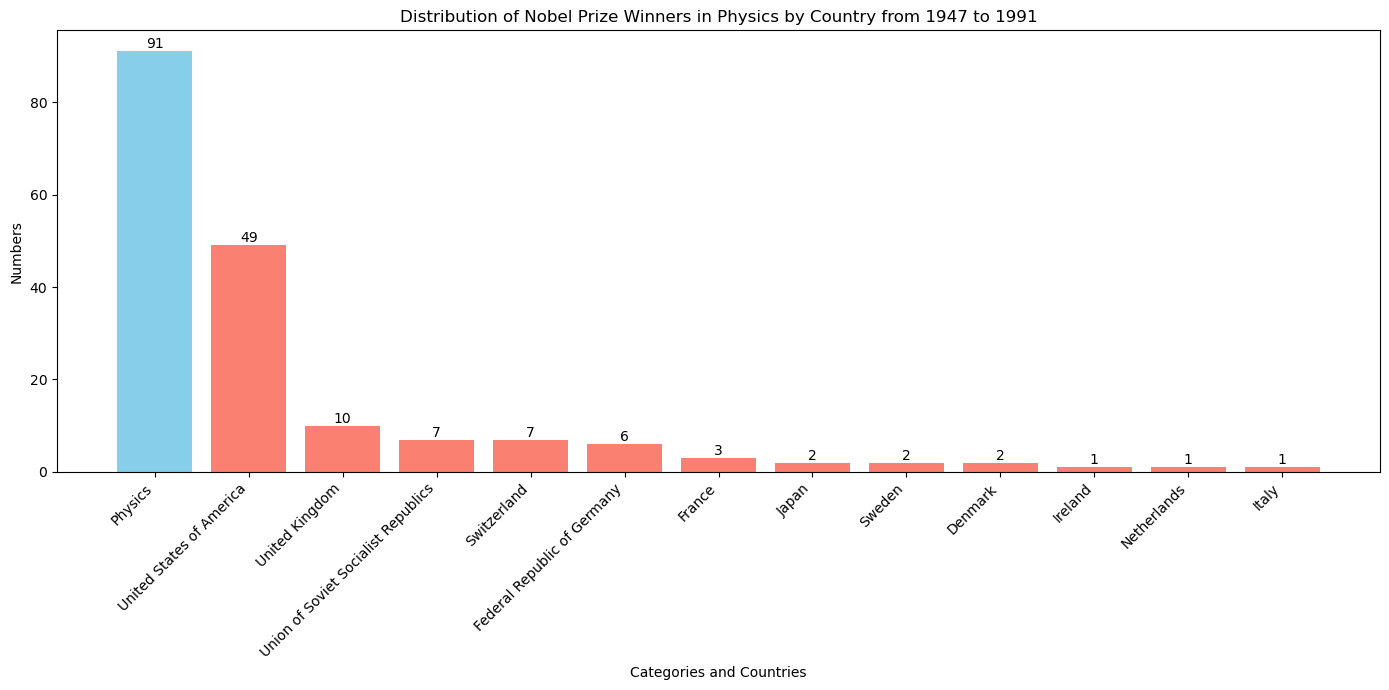

In [69]:
categories = category_counts.index
countries = country_counts.index
values = np.concatenate([category_counts.values, country_counts.values])
colors = ['skyblue'] * len(categories) + ['salmon'] * len(countries)
plt.figure(figsize=(14, 7))
bars = plt.bar(np.arange(len(categories) + len(countries)), values, color=colors)
plt.xlabel('Categories and Countries')
plt.ylabel('Numbers')
plt.title('Distribution of Nobel Prize Winners in Physics by Country from 1947 to 1991')
plt.xticks(np.arange(len(categories) + len(countries)), list(categories) + list(countries), rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [70]:
filtered_data = df[(df['year']>=1947) & (df['year']<=1991) & (df['category']=='Literature')]

In [71]:
category_counts = filtered_data['category'].value_counts()
country_counts = filtered_data['birth_country'].value_counts()

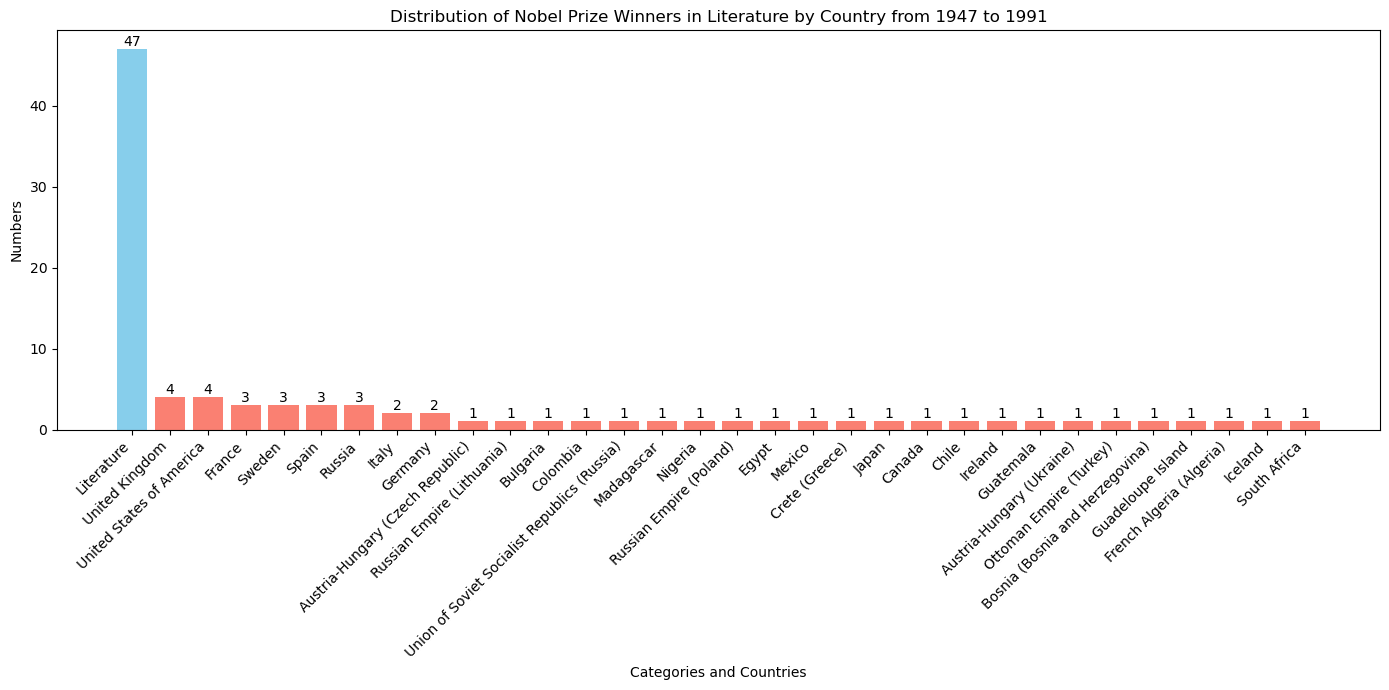

In [72]:
categories = category_counts.index
countries = country_counts.index
values = np.concatenate([category_counts.values, country_counts.values])
colors = ['skyblue'] * len(categories) + ['salmon'] * len(countries)
plt.figure(figsize=(14, 7))
bars = plt.bar(np.arange(len(categories) + len(countries)), values, color=colors)
plt.xlabel('Categories and Countries')
plt.ylabel('Numbers')
plt.title('Distribution of Nobel Prize Winners in Literature by Country from 1947 to 1991')
plt.xticks(np.arange(len(categories) + len(countries)), list(categories) + list(countries), rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()

The graphs above visualize the award-winning countries and the number of awards for each category. Peace and Literature awards are visualized by country of birth. This is because these awards can be received for work done without being part of an organization. Again, the United States of America has superiority in all categories except literature. Especially in the physics category, they received more than half of the awards. We can attribute this to the work of scientists who had to emigrate from Europe during and after the war.

## 7.Visualize the countries and ages of people in the categories of Chemistry, Literature, Peace, Physics and Medicine after 2000. (Separate visualizations are required for each category) Interpret the data.

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [74]:
df = pd.read_csv ('C:/Users/serif/OneDrive/Desktop/VERİ ÇALIŞMALARI/Python/Python_Proje/proje.csv')

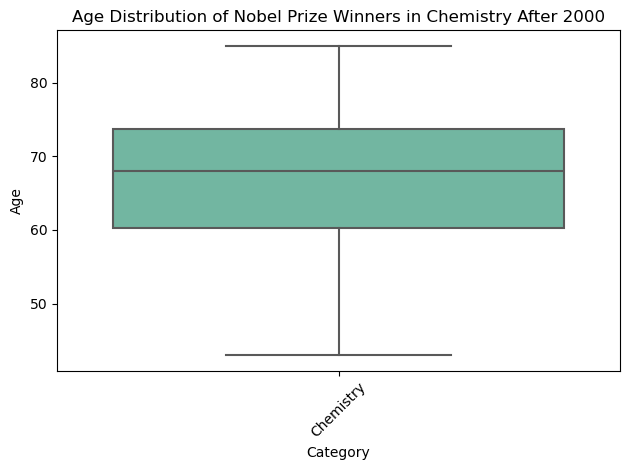

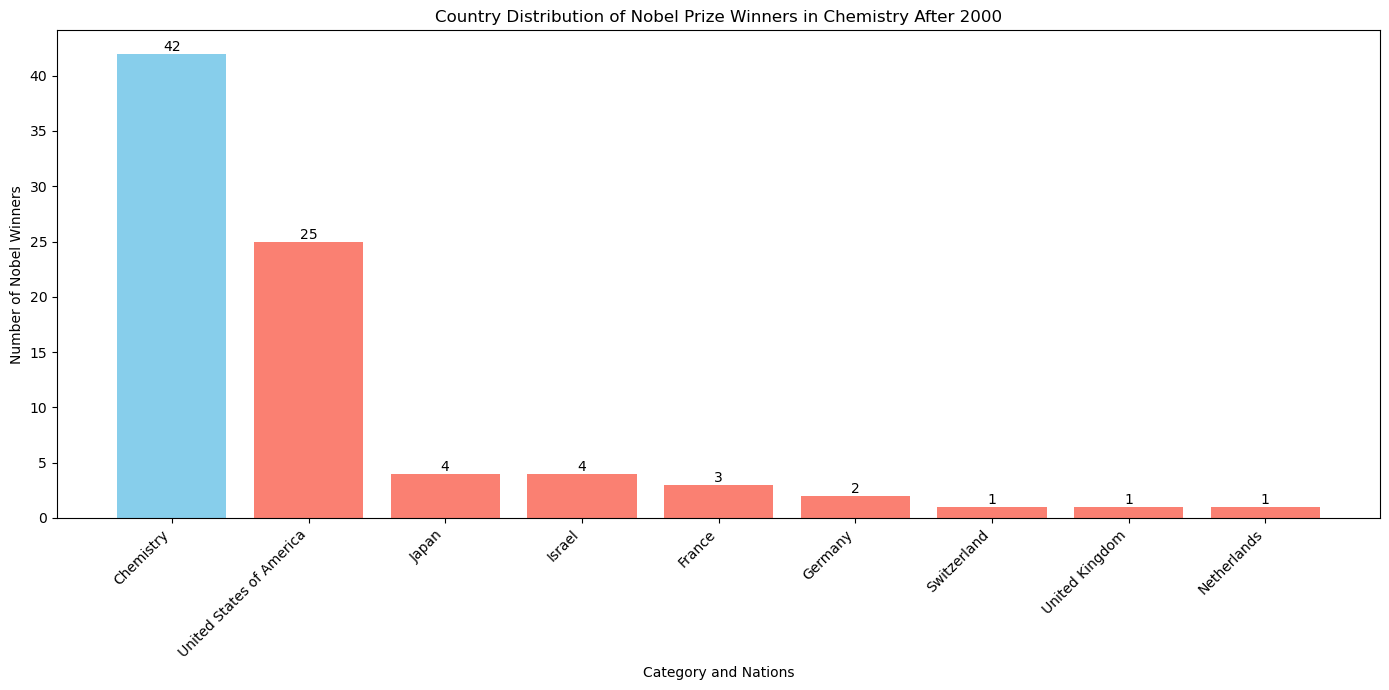

In [75]:
df["year"] = pd.to_datetime(df["year"], format="%Y")

selected_categories = ["Chemistry"]
filtered_data = df[(df["year"].dt.year>=2000) & (df["category"].isin(selected_categories))]

filtered_data = filtered_data.dropna(subset=["birth_date"])

filtered_data["birth_date"] = pd.to_datetime(filtered_data["birth_date"], errors="coerce" )
filtered_data["age"] = filtered_data["year"].dt.year - filtered_data["birth_date"].dt.year

sns.boxplot(x="category", y="age", data=filtered_data, palette="Set2")
plt.title("Age Distribution of Nobel Prize Winners in Chemistry After 2000")
plt.xlabel("Category")
plt.ylabel("Age")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



category_counts = filtered_data['category'].value_counts()
country_counts = filtered_data['organization_country'].value_counts()

categories = category_counts.index
countries = country_counts.index
values = np.concatenate([category_counts.values, country_counts.values])
colors = ['skyblue'] * len(categories) + ['salmon'] * len(countries)
plt.figure(figsize=(14, 7))
bars = plt.bar(np.arange(len(categories) + len(countries)), values, color=colors)
plt.xlabel('Category and Nations')
plt.ylabel('Number of Nobel Winners')
plt.title('Country Distribution of Nobel Prize Winners in Chemistry After 2000')
plt.xticks(np.arange(len(categories) + len(countries)), list(categories) + list(countries), rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()

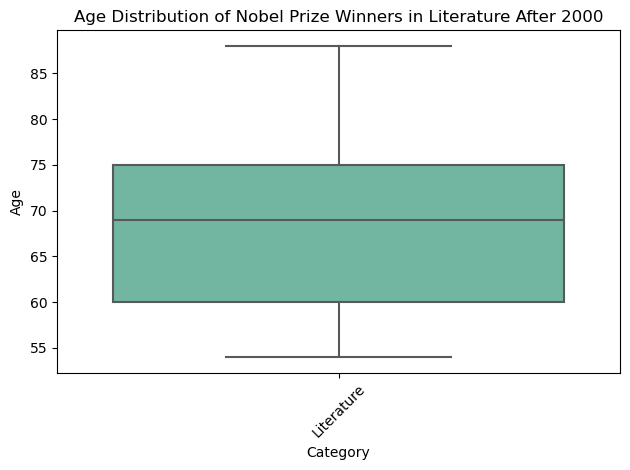

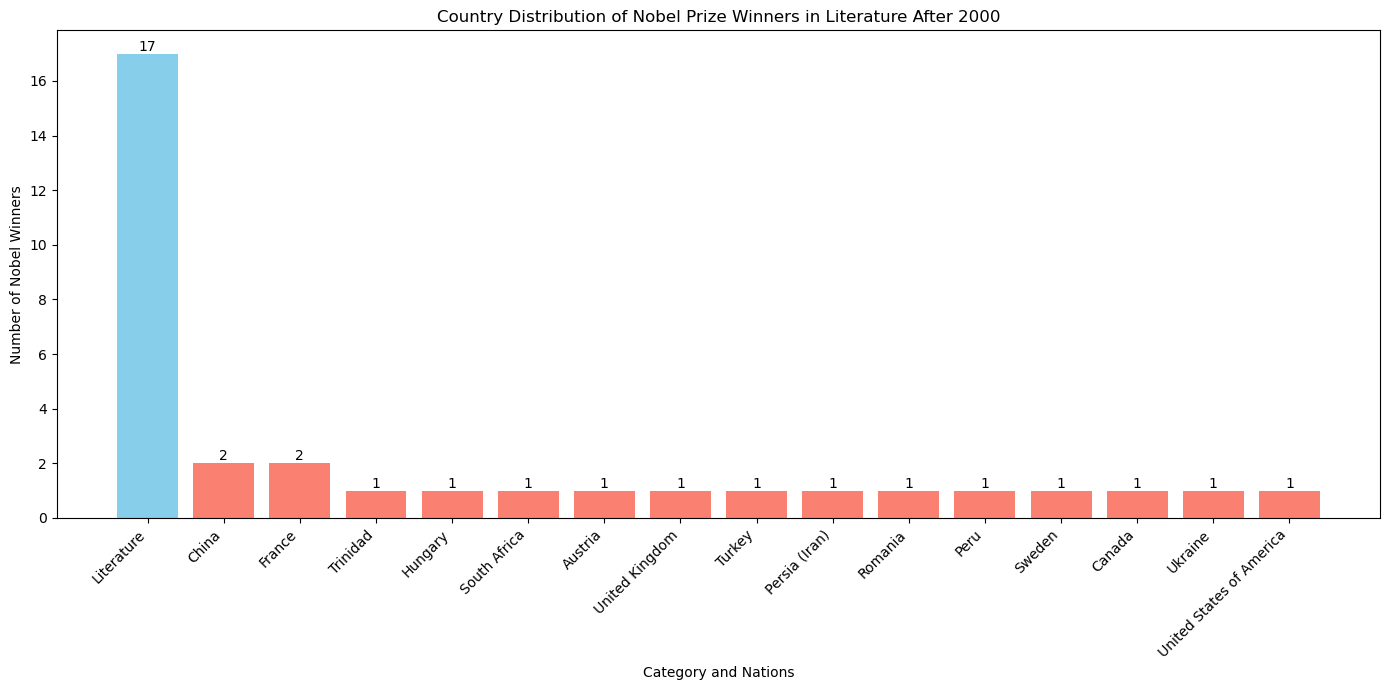

In [76]:
df["year"] = pd.to_datetime(df["year"], format="%Y")

selected_categories = ["Literature"]
filtered_data = df[(df["year"].dt.year>=2000) & (df["category"].isin(selected_categories))]

filtered_data = filtered_data.dropna(subset=["birth_date"])

filtered_data["birth_date"] = pd.to_datetime(filtered_data["birth_date"], errors="coerce" )
filtered_data["age"] = filtered_data["year"].dt.year - filtered_data["birth_date"].dt.year

sns.boxplot(x="category", y="age", data=filtered_data, palette="Set2")
plt.title("Age Distribution of Nobel Prize Winners in Literature After 2000")
plt.xlabel("Category")
plt.ylabel("Age")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


category_counts = filtered_data['category'].value_counts()
country_counts = filtered_data['birth_country'].value_counts()

categories = category_counts.index
countries = country_counts.index
values = np.concatenate([category_counts.values, country_counts.values])
colors = ['skyblue'] * len(categories) + ['salmon'] * len(countries)
plt.figure(figsize=(14, 7))
bars = plt.bar(np.arange(len(categories) + len(countries)), values, color=colors)
plt.xlabel('Category and Nations')
plt.ylabel('Number of Nobel Winners')
plt.title('Country Distribution of Nobel Prize Winners in Literature After 2000')
plt.xticks(np.arange(len(categories) + len(countries)), list(categories) + list(countries), rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()

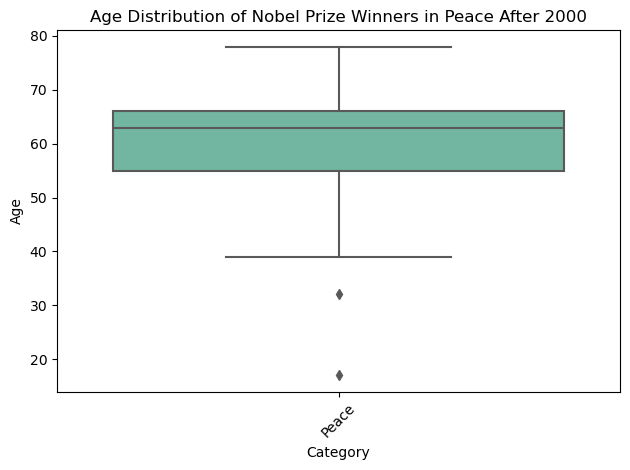

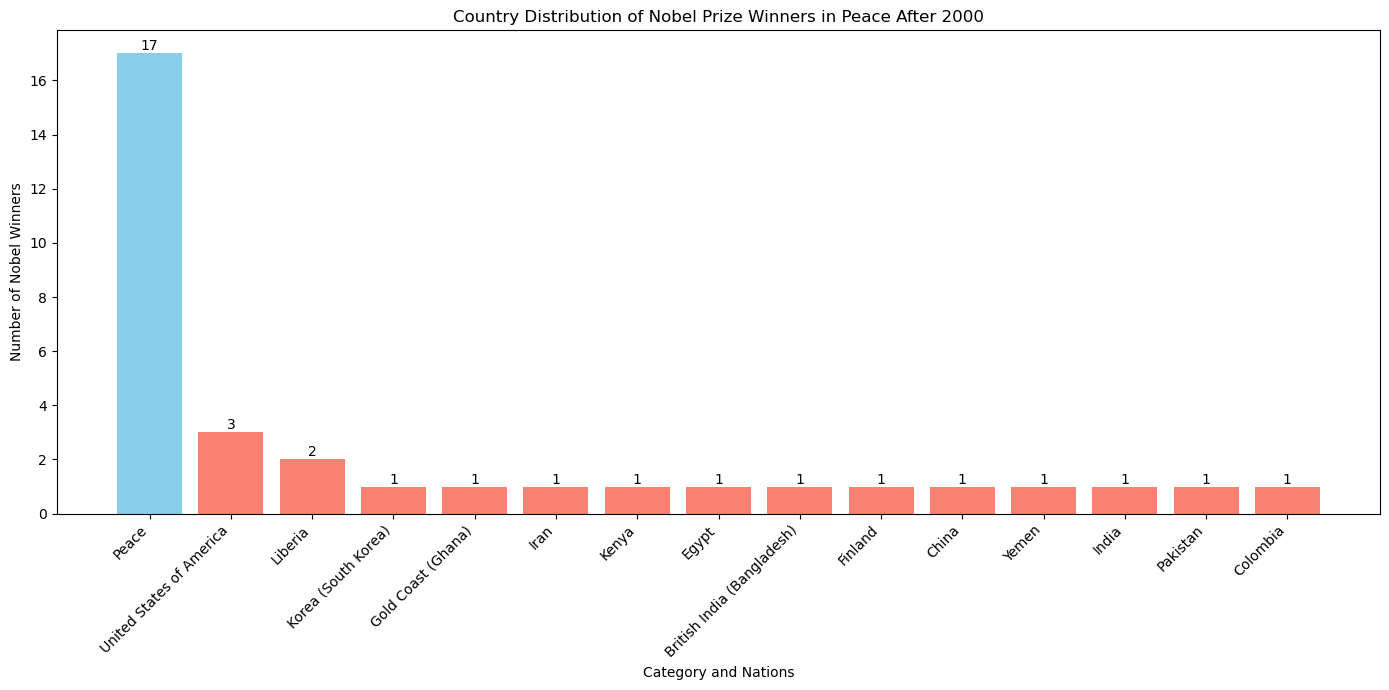

In [77]:
df["year"] = pd.to_datetime(df["year"], format="%Y")

selected_categories = ["Peace"]
filtered_data = df[(df["year"].dt.year>=2000) & (df["category"].isin(selected_categories))]

filtered_data = filtered_data.dropna(subset=["birth_date"])

filtered_data["birth_date"] = pd.to_datetime(filtered_data["birth_date"], errors="coerce" )
filtered_data["age"] = filtered_data["year"].dt.year - filtered_data["birth_date"].dt.year

sns.boxplot(x="category", y="age", data=filtered_data, palette="Set2")
plt.title("Age Distribution of Nobel Prize Winners in Peace After 2000")
plt.xlabel("Category")
plt.ylabel("Age")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


category_counts = filtered_data['category'].value_counts()
country_counts = filtered_data['birth_country'].value_counts()

categories = category_counts.index
countries = country_counts.index
values = np.concatenate([category_counts.values, country_counts.values])
colors = ['skyblue'] * len(categories) + ['salmon'] * len(countries)
plt.figure(figsize=(14, 7))
bars = plt.bar(np.arange(len(categories) + len(countries)), values, color=colors)
plt.xlabel('Category and Nations')
plt.ylabel('Number of Nobel Winners')
plt.title('Country Distribution of Nobel Prize Winners in Peace After 2000')
plt.xticks(np.arange(len(categories) + len(countries)), list(categories) + list(countries), rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()

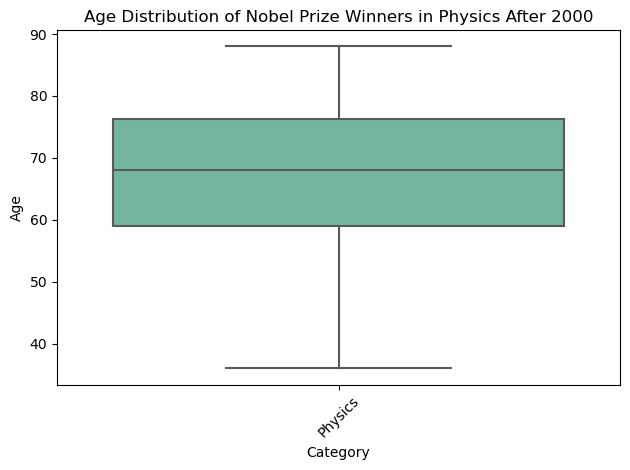

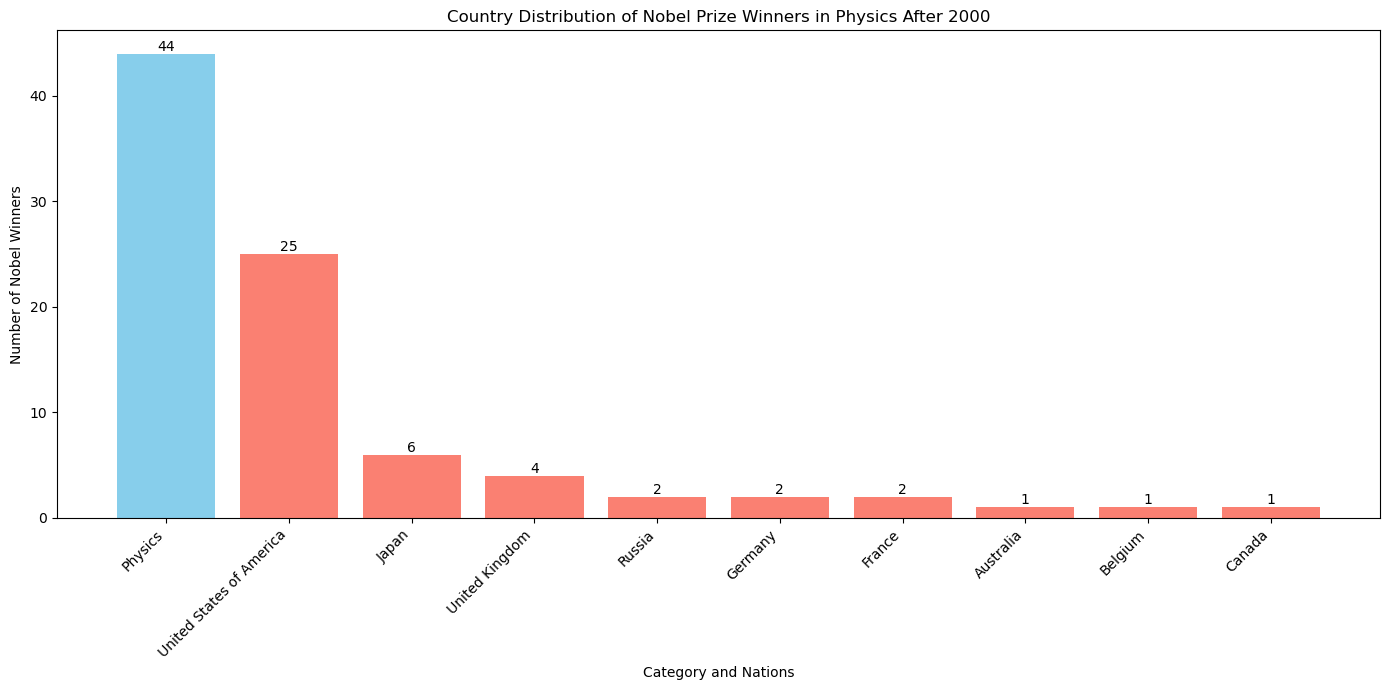

In [78]:
df["year"] = pd.to_datetime(df["year"], format="%Y")

selected_categories = ["Physics"]
filtered_data = df[(df["year"].dt.year>=2000) & (df["category"].isin(selected_categories))]

filtered_data = filtered_data.dropna(subset=["birth_date"])

filtered_data["birth_date"] = pd.to_datetime(filtered_data["birth_date"], errors="coerce" )
filtered_data["age"] = filtered_data["year"].dt.year - filtered_data["birth_date"].dt.year

sns.boxplot(x="category", y="age", data=filtered_data, palette="Set2")
plt.title("Age Distribution of Nobel Prize Winners in Physics After 2000")
plt.xlabel("Category")
plt.ylabel("Age")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


category_counts = filtered_data['category'].value_counts()
country_counts = filtered_data['organization_country'].value_counts()

categories = category_counts.index
countries = country_counts.index
values = np.concatenate([category_counts.values, country_counts.values])
colors = ['skyblue'] * len(categories) + ['salmon'] * len(countries)
plt.figure(figsize=(14, 7))
bars = plt.bar(np.arange(len(categories) + len(countries)), values, color=colors)
plt.xlabel('Category and Nations')
plt.ylabel('Number of Nobel Winners')
plt.title('Country Distribution of Nobel Prize Winners in Physics After 2000')
plt.xticks(np.arange(len(categories) + len(countries)), list(categories) + list(countries), rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()

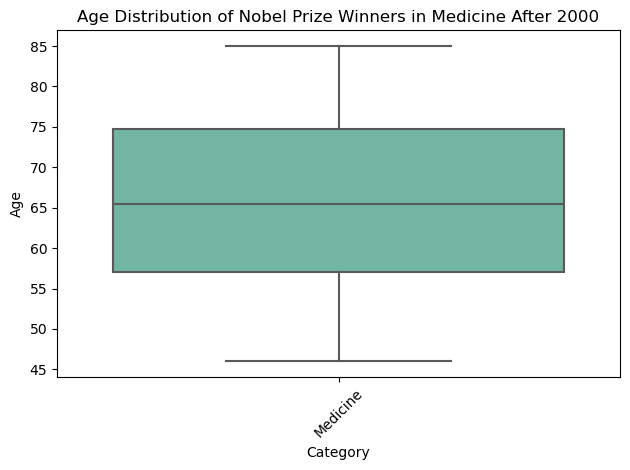

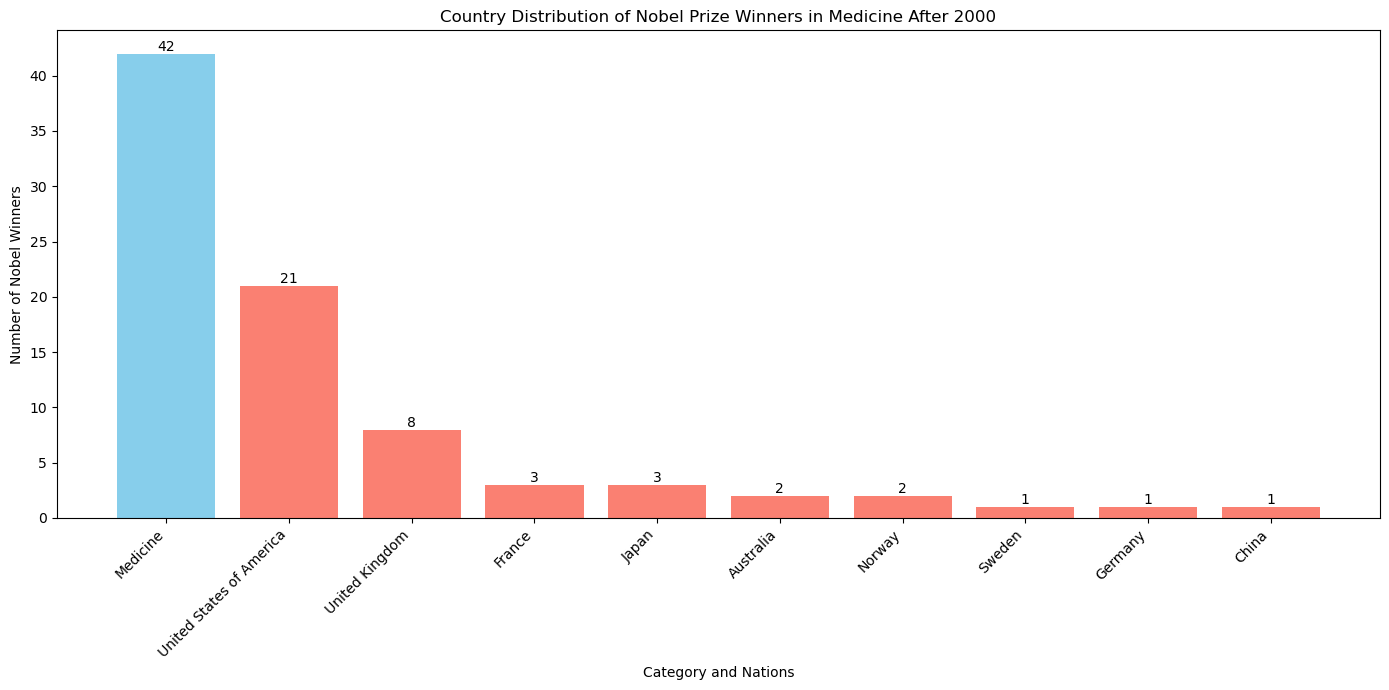

In [79]:
df["year"] = pd.to_datetime(df["year"], format="%Y")

selected_categories = ["Medicine"]
filtered_data = df[(df["year"].dt.year>=2000) & (df["category"].isin(selected_categories))]

filtered_data = filtered_data.dropna(subset=["birth_date"])

filtered_data["birth_date"] = pd.to_datetime(filtered_data["birth_date"], errors="coerce" )
filtered_data["age"] = filtered_data["year"].dt.year - filtered_data["birth_date"].dt.year

sns.boxplot(x="category", y="age", data=filtered_data, palette="Set2")
plt.title("Age Distribution of Nobel Prize Winners in Medicine After 2000")
plt.xlabel("Category")
plt.ylabel("Age")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


category_counts = filtered_data['category'].value_counts()
country_counts = filtered_data['organization_country'].value_counts()

categories = category_counts.index
countries = country_counts.index
values = np.concatenate([category_counts.values, country_counts.values])
colors = ['skyblue'] * len(categories) + ['salmon'] * len(countries)
plt.figure(figsize=(14, 7))
bars = plt.bar(np.arange(len(categories) + len(countries)), values, color=colors)
plt.xlabel('Category and Nations')
plt.ylabel('Number of Nobel Winners')
plt.title('Country Distribution of Nobel Prize Winners in Medicine After 2000')
plt.xticks(np.arange(len(categories) + len(countries)), list(categories) + list(countries), rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()

Above, the age distribution and the countries of the awardees in the Chemistry, Literature, Peace, Physics and Medicine categories are visualized. Separate images are used for each category. The age distribution is almost the same for each category. It has an average in the range of 55-75. There are only two cases in the peace prize category: two women, aged 32 and 17, received the peace prize. In categories that require more traditional and strong institutional structures, such as Chemistry, Physics, and Medicine, American and European countries seem to constitute the majority. On the other hand, there is greater diversity in the Peace and Literature prizes. In particular, the peace prizes seem to recognize the efforts of activists from relatively undeveloped parts of the world that have suffered the most from war and from regions with fewer human rights.